In [1]:
import fenics
%matplotlib inline
import matplotlib.pyplot as plt 

## Mesh

In [2]:
mesh = fenics.UnitIntervalMesh(10)

A mesh is a collection of nodes and elements

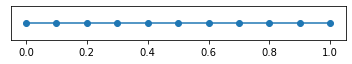

In [3]:
fenics.plot(mesh)

In [4]:
mesh.hmax()

0.10000000000000009

In [5]:
nodes = mesh.coordinates()
elements = mesh.cells()
print(nodes)
print(elements)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]


## Element and finite element function space

In [6]:
element = fenics.FiniteElement('Lagrange', fenics.interval,  1)

In [7]:
V = fenics.FunctionSpace(mesh, element)

In [8]:
V.tabulate_dof_coordinates()

array([[1. ],
       [0.9],
       [0.8],
       [0.7],
       [0.6],
       [0.5],
       [0.4],
       [0.3],
       [0.2],
       [0.1],
       [0. ]])

## Approximation of a function in a FE function space: interpolation

In [10]:
myexpression = fenics.Expression('sin(2*pi*x[0])',degree=1)
myexpression
u = fenics.interpolate(myexpression, V)

In [11]:
U = u.vector()

In [12]:
U.get_local()

array([-2.44929360e-16, -5.87785252e-01, -9.51056516e-01, -9.51056516e-01,
       -5.87785252e-01,  1.22464680e-16,  5.87785252e-01,  9.51056516e-01,
        9.51056516e-01,  5.87785252e-01,  0.00000000e+00])

We can use matplotlib to plot the array

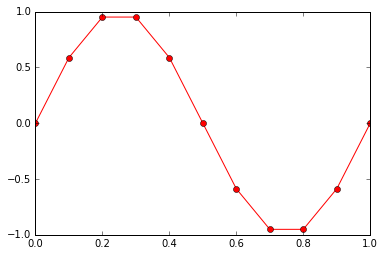

In [24]:
plt.plot(V.tabulate_dof_coordinates(),U.array(),"ro-")